In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
import keras

Using TensorFlow backend.


## 3.1 NN with a data frame ## 

In [0]:
from keras.models import Sequential
from keras.layers import Dense


#pip3 install --upgrade tensorflow

In [0]:
boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
target = boston.target

In [0]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [0]:
test_len = int(round(boston_df.shape[0]*0.8))

X_train = boston_df[:test_len]
#these two do not share any common elements 
X_test = boston_df[test_len:]

Y_train = target[:test_len]
Y_test = target[test_len:]

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn import metrics


X_train, X_test, Y_train, Y_test = train_test_split(boston_df, target, test_size=0.5, random_state=1)

In [0]:
l = [0,1,2,3,4,5,6,7,8,9,10]
a = l[0:2]

b = l[2:4]

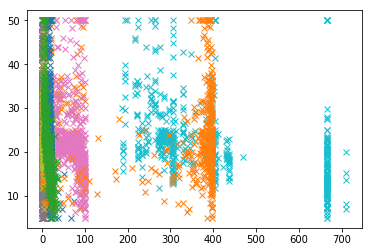

In [0]:
for column in list(boston_df.columns.values): 
    plt.plot(boston_df[column], target, "x")

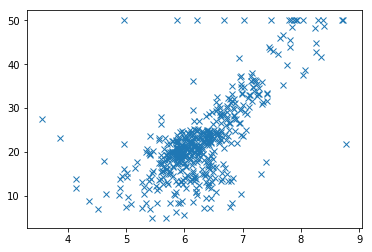

In [0]:
plt.plot(boston_df[(list(boston_df.columns.values))[5]], target, "x")

In [0]:
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model

#reg = LinearRegression(normalize=True).fit(X_train[X_train.columns[5]], Y_train)

regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, Y_train)
#regr.fit(X_train.iloc[:, 5:10], Y_train)
mse = np.mean((Y_test - regr.predict(X_test)) ** 2)
print(mse)

22.839287038640393


In [0]:
model = Sequential([
    Dense(32, activation = "relu", input_shape=(13,)),
    Dense(1, activation="softmax"),
])

In [0]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [0]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
253/253 [==============================] - 0s 94us/step - loss: 523.5747 - mean_absolute_error: 21.0466
Epoch 2/100
253/253 [==============================] - 0s 63us/step - loss: 523.5747 - mean_absolute_error: 21.0466
Epoch 3/100
253/253 [==============================] - 0s 64us/step - loss: 523.5747 - mean_absolute_error: 21.0466
Epoch 4/100
253/253 [==============================] - 0s 73us/step - loss: 523.5747 - mean_absolute_error: 21.0466
Epoch 5/100
253/253 [==============================] - 0s 53us/step - loss: 523.5747 - mean_absolute_error: 21.0466
Epoch 6/100
253/253 [==============================] - 0s 55us/step - loss: 523.5747 - mean_absolute_error: 21.0466
Epoch 7/100
253/253 [==============================] - 0s 55us/step - loss: 523.5747 - mean_absolute_error: 21.0466
Epoch 8/100
253/253 [==============================] - 0s 62us/step - loss: 523.5747 - mean_absolute_error: 21.0466
Epoch 9/100
253/253 [==============================] - 0s 52us/step - lo

## 2.2 Nerual nets ## 

In [0]:
income = pd.read_csv('adult.csv', sep=',')

In [0]:
income_features = income.drop("income",axis=1)
income_output = income["income"]

income_trainlen = int(round(income.shape[0]*0.7))

income_tran = income_features[:income_trainlen]
income_test = income_features[income_trainlen:]

income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [0]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.20.0.


In [0]:
#no na values 
income.isnull().values.any()

False

In [0]:
[income[f].unique() for f in list(income)]

    

[array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
        29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
        50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
        65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
        88, 84, 85, 86, 87], dtype=int64),
 array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
        'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
       dtype=object),
 array([ 77053, 132870, 186061, ...,  34066,  84661, 257302], dtype=int64),
 array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
        'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
        'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
       dtype=object),
 array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
       dtype=int64),
 array(['Widowed', 'Divorced', 'Separated', 'Never-married',
        'Married-civ-spouse',

In [0]:
income[income.workclass=="?"]
income[income.occupation=="?"]
income[income["native.country"]=="?"]


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,?,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,?,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,?,>50K
132,68,State-gov,202699,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2377,42,?,>50K
148,34,Private,25322,Bachelors,13,Married-spouse-absent,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,2339,40,?,<=50K
150,55,Private,158702,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,2339,45,?,<=50K
240,43,Private,143582,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Wife,Asian-Pac-Islander,Female,0,2129,72,?,<=50K
429,51,Private,199688,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,60,?,>50K


In [0]:
income_woNA = income.drop(income[income.workclass == "?"].index | income[income.occupation =="?"].index 
                      |income[income["native.country"] =="?"].index )


income.workclass== "?"

0         True
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14        True
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24        True
25       False
26       False
27       False
28       False
29       False
         ...  
32531    False
32532    False
32533     True
32534     True
32535    False
32536    False
32537    False
32538    False
32539    False
32540    False
32541     True
32542    False
32543     True
32544     True
32545    False
32546    False
32547    False
32548    False
32549    False
32550    False
32551    False
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, Length: 32561, dtype: bool

In [0]:
income2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


In [0]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


tc = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [1,3,5,6,7,8,9,12,13]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
print(tc.fit_transform(income_woNA)) # Notice the output is a string

[[0.0 0.0 1.0 ... 0 4356 '<=50K']
 [0.0 0.0 1.0 ... 0 3900 '<=50K']
 [0.0 0.0 1.0 ... 0 3900 '<=50K']
 ...
 [0.0 0.0 1.0 ... 0 0 '>50K']
 [0.0 0.0 1.0 ... 0 0 '<=50K']
 [0.0 0.0 1.0 ... 0 0 '<=50K']]


In [0]:
encoded = pd.DataFrame(tc.fit_transform(income_woNA))

income_features = encoded.drop(197,axis=1)

income_output = encoded[197]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(income_output)

income_trainlen = int(round(income.shape[0]*0.7))

income_Xtrain = income_features[:income_trainlen]
income_Xtest = income_features[income_trainlen:]

income_Ytrain = integer_encoded[:income_trainlen]
income_Ytest = integer_encoded[income_trainlen:]
integer_encoded

len(income_Ytrain)

22793

In [0]:

model = Sequential()
model.add(Dense(20, input_dim=197, activation='relu'))
model.add(Dense(1, activation='relu'))

In [0]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(income_Xtrain, income_Ytrain, epochs=70, batch_size=10)

Epoch 1/70
22793/22793 [==============================] - ETA: 0s - loss: 19778.4164 - acc: 0.7358- ETA: 0s - loss: 22 - 8s 334us/step - loss: 19680.3633 - acc: 0.7356
Epoch 2/70
22793/22793 [==============================] - 7s 293us/step - loss: 0.2644 - acc: 0.7356
Epoch 3/70
22793/22793 [==============================] - 7s 287us/step - loss: 0.2644 - acc: 0.7356 4s - loss: 0.259 - ETA: 3s -  - ETA: 1s - lo - ETA: 0s - loss: 0.2630 - 
Epoch 4/70
14830/22793 [==================>...........] - ETA: 2s - loss: 0.2659 - acc: 0.7341- ETA: 3s - loss

KeyboardInterrupt: 

In [0]:
scores = model.evaluate(income_Xtest, income_Ytest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7369/7369 [==============================] - 1s 105us/step

acc: 79.89%


In [0]:
len(income_Ytest)

9768

In [0]:
income_Xtest

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
22793,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,26,125089,10,0,0
22794,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,30,289458,13,0,0
22795,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,34,144798,10,0,0
22796,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,28,207513,9,0,0
22797,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,19,213024,8,0,0
22798,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,24,83374,10,0,0
22799,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,37,192939,13,0,0
22800,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,24,424494,13,0,0
22801,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,24,215243,13,0,0
22802,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,40,30682,9,0,0


In [0]:
income_woNA2 = income_woNA
income_labelled = income_woNA2.apply(LabelEncoder().fit_transform)
income_woNA2_features =  income_labelled.drop("income",axis=1)
income_labelled_Xtrain =income_woNA2_features[:income_trainlen]
income_labelled_Xtest = income_woNA2_features[income_trainlen:] 

income_woNA2_features

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,65,2,6096,11,8,6,3,1,4,0,0,89,17,38
3,37,2,6564,5,3,0,6,4,4,0,0,88,39,38
4,24,2,15770,15,9,5,9,3,4,0,0,88,39,38
5,17,2,13278,11,8,0,7,4,4,0,0,87,44,38
6,21,2,7296,0,5,5,0,4,4,1,0,87,39,38
7,57,5,2965,10,15,4,9,2,4,0,0,86,19,38
8,51,0,19540,11,8,0,9,1,4,0,0,86,39,38
10,28,2,9020,10,15,0,9,4,2,0,0,85,34,38
11,21,4,8329,14,14,4,9,1,4,1,0,84,44,38
12,35,2,5869,9,12,6,7,1,4,0,0,84,19,38


In [0]:
unique, counts = np.unique(income_woNA2_features.race, return_counts=True)
dict(zip(unique, counts))

#(le.inverse_transform([2, 2, 1]))

unique, counts = np.unique(income_woNA2_features.sex, return_counts=True)
dict(zip(unique, counts))

{0: 9782, 1: 20380}

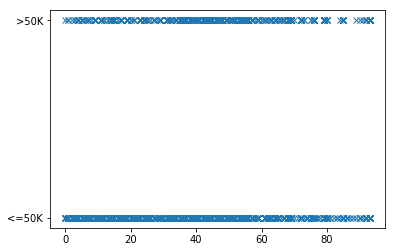

In [0]:
plt.plot(income_woNA2_features["hours.per.week"], income_output, "x")

In [0]:
model = Sequential()
model.add(Dense(50, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


model.fit(income_labelled_Xtrain, income_Ytrain, epochs=150, batch_size=10)



Epoch 1/150
22793/22793 [==============================] - 7s 301us/step - loss: 0.2643 - acc: 0.7357
Epoch 2/150
22793/22793 [==============================] - 5s 236us/step - loss: 0.2642 - acc: 0.7358
Epoch 3/150
22793/22793 [==============================] - 7s 289us/step - loss: 0.2644 - acc: 0.7356
Epoch 4/150
22793/22793 [==============================] - 7s 326us/step - loss: 0.2644 - acc: 0.7356
Epoch 5/150
22793/22793 [==============================] - 8s 340us/step - loss: 0.2644 - acc: 0.7356
Epoch 6/150
22793/22793 [==============================] - 8s 343us/step - loss: 0.2644 - acc: 0.7356
Epoch 7/150
22793/22793 [==============================] - ETA: 0s - loss: 0.2643 - acc: 0.7357- ETA - ETA: 1s - loss: 0 - ETA: 0s - loss: 0 - 8s 353us/step - loss: 0.2644 - acc: 0.7356
Epoch 8/150
22793/22793 [==============================] - 9s 384us/step - loss: 0.2644 - acc: 0.7356 0s - loss: 0.2641 - acc: 0.7
Epoch 9/150
 4650/22793 [=====>........................] - ETA: 4s - lo

KeyboardInterrupt: 

In [0]:
scores = model.evaluate(income_labelled_Xtest, income_Ytest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7369/7369 [==============================] - 1s 110us/step

acc: 79.89%


In [0]:
income_labelled_Xtrain

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,65,2,6096,11,8,6,3,1,4,0,0,89,17,38
3,37,2,6564,5,3,0,6,4,4,0,0,88,39,38
4,24,2,15770,15,9,5,9,3,4,0,0,88,39,38
5,17,2,13278,11,8,0,7,4,4,0,0,87,44,38
6,21,2,7296,0,5,5,0,4,4,1,0,87,39,38
7,57,5,2965,10,15,4,9,2,4,0,0,86,19,38
8,51,0,19540,11,8,0,9,1,4,0,0,86,39,38
10,28,2,9020,10,15,0,9,4,2,0,0,85,34,38
11,21,4,8329,14,14,4,9,1,4,1,0,84,44,38
12,35,2,5869,9,12,6,7,1,4,0,0,84,19,38


## 2.3 Image recognition ## 

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
batch_size = 128

num_classes = 10

epochs = 12



# input image dimensions

img_rows, img_cols = 28, 28



# the data, split between train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()



if K.image_data_format() == 'channels_first':

    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)

    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)

else:

    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)

    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)



x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

x_train /= 255

x_test /= 255

print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')

print(x_test.shape[0], 'test samples')



# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)



model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),

                 activation='relu',

                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=keras.losses.categorical_crossentropy,

              optimizer=keras.optimizers.Adadelta(),

              metrics=['accuracy'])



model.fit(x_train, y_train,

          batch_size=batch_size,

          epochs=epochs,

          verbose=1,

          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 274s 5ms/step - loss: 0.2746 - acc: 0.9164 - val_loss: 0.0572 - val_acc: 0.9815
Epoch 2/12
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0920 - acc: 0.9726 - val_loss: 0.0455 - val_acc: 0.9848
Epoch 3/12
60000/60000 [==============================] - 270s 4ms/step - loss: 0.0660 - acc: 0.9798 - val_loss: 0.0379 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 9913s 165ms/step - loss: 0.0580 - acc: 0.9824 - val_loss: 0.0370 - val_acc: 0.9879
Epoch 5/12
38528/60000 [==================>...........] - ETA: 1:36 - loss: 0.0476 - acc: 0.9856